演習課題(Day_1)

### 1. データの読み込み 

In [262]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   #3D散布図の描画
# import os
# path = os.getcwd()
# print(path)


In [263]:
# データの読み込み
# データの加工
# 1) pandas 関数で,を .に変換する

df_car1 = pd.read_csv("../1_data/measurements.csv")

#pd.Series(df_car1) 
#display(df_car1.head())                                                  
df_car1 = df_car1.replace(',','.', regex=True)
#　print(df_car1.replace(',','.', regex=True))

#df_car1 = df_car1.temp_inside.replace(",", ".")

#df_car = pd.read_csv("../1_data/measurements.csv")[["distance","consume","speed","temp_outside"]]
#display(df_car.head(5))
#df_car = df_car.replace(',','.', regex=True)
#display(df_car.head(5))

#　ガスタイプの加工
#df_car1["gas_type_1"] = df_car1["gas_type"]
#df_car1["gas_type_2"] = df_car1["gas_type"]


df_car1["gas_type"] = df_car1["gas_type"].replace("E10","1",regex = True)
df_car1["gas_type"] = df_car1["gas_type"].replace("sp98","0",regex = True)
df_car1["gas_type"] = df_car1["gas_type"].replace("SP98","0",regex = True)
df_car1["gas_type"] = df_car1["gas_type"].replace("E10","1",regex = True)
# df_car1["gas_type"] = df_car1["gas_type"].astype(np.int64)
df_car1["distance"] = df_car1["distance"].astype(np.float64)
df_car1["consume"] = df_car1["consume"].astype(np.float64)
df_car1["speed"] = df_car1["speed"].astype(np.float64)
df_car1["temp_outside"] = df_car1["temp_outside"].astype(np.float64)

#display(df_car1.head(50))

# 先頭と最後を打出し
display(df_car1.head(5))
display(df_car1.tail(5))

# df_car1.describe()
df_car1.count()

# 欠損値の処理方法　①削除　②穴埋め(平均、最頻値、中央値）
#　temp_inside に欠損値有り　⇒　consume との相関が低いため、欠損値を無視する．
#　df.dropna(subset=["temp_inside]) temp_insideに含まれる欠損値のみを削除


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26.0,21.5,12.0,NaN,1,0,0,0,45,E10
1,12.0,4.2,30.0,21.5,13.0,NaN,1,0,0,0,NaN,NaN
2,11.2,5.5,38.0,21.5,15.0,NaN,1,0,0,0,NaN,NaN
3,12.9,3.9,36.0,21.5,14.0,NaN,1,0,0,0,NaN,NaN
4,18.5,4.5,46.0,21.5,15.0,NaN,1,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16.0,3.7,39.0,24.5,18.0,NaN,0,0,0,0,NaN,NaN
384,16.1,4.3,38.0,25,31.0,AC,0,1,0,0,NaN,NaN
385,16.0,3.8,45.0,25,19.0,NaN,0,0,0,0,NaN,NaN
386,15.4,4.6,42.0,25,31.0,AC,0,1,0,0,NaN,NaN
387,14.7,5.0,25.0,25,30.0,AC,0,1,0,0,NaN,NaN


distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

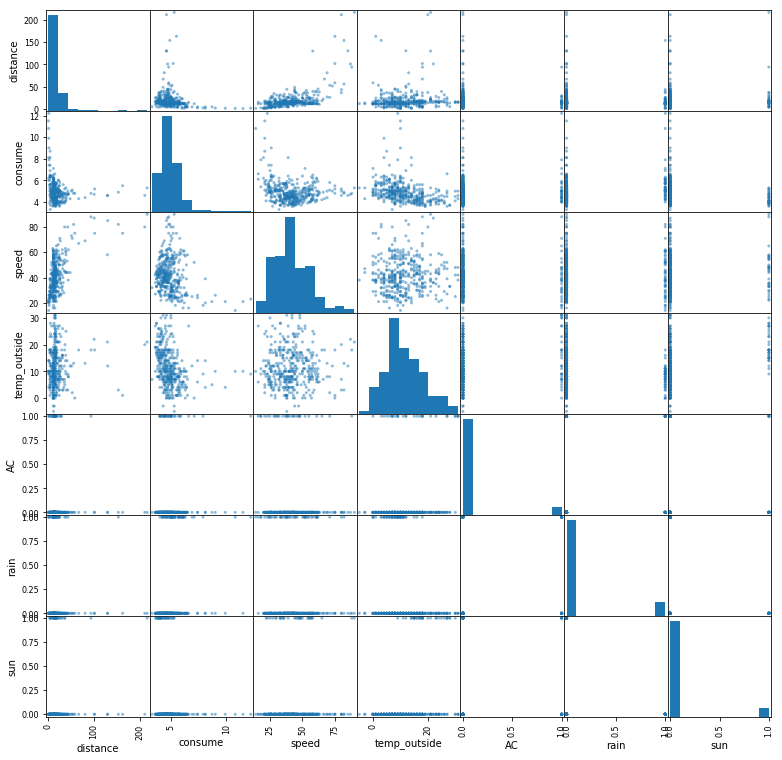

,distance,consume,speed,temp_outside,AC,rain,sun
distance,1.000000,-0.128967,0.562299,0.088175,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.015411,-0.035408,0.009489,0.081618
temp_outside,0.088175,-0.320811,0.015411,1.000000,0.167562,-0.186315,0.346903
AC,-0.025738,0.096591,-0.035408,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.346903,0.088598,-0.112650,1.000000


In [264]:
#　散布図行列の作図　⇒　相関性の確認（必須）有無、強弱を確認
pd.plotting.scatter_matrix(df_car1, figsize=(13,13))                                     
plt.show()

#　相関係数の確認
df_car1.corr()

# 相関性　弱い負の相関　consume　
#　0.2~0.4　弱い正（または負）の相関？　　要チェック：相関性の判断方法
#　目的変数「consume」に相関が強い説明変数を確認　⇒　distance speed temp_outside の3個 
#　rainは数値は大きいが（0.248）、図が今一つ？

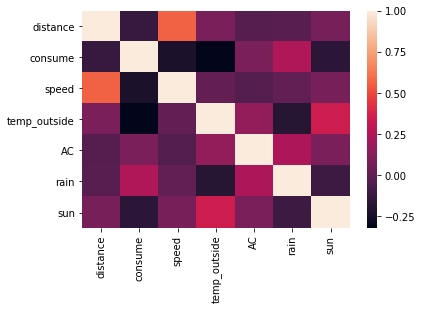

In [265]:
#相関係数をヒートマップで可視化
sns.heatmap(df_car1.corr())
plt.show()

In [266]:
#　説明変数3個で線形回帰
#　係数を求める
y = df_car1["consume"].values
X = df_car1[["distance", "speed", "temp_outside"]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

#　重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]

# 変数の設定
x1 = df_car1["distance"]
x2 = df_car1["speed"]
x3 = df_car1["temp_outside"]


# 重みと二乗誤差の確認  TEX_1_52
y_est = w0 + w2 * x2  + w3 * x3  + w1 * x1 
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3, squared_error))
print("二乗誤差 = {:.3f}".format(squared_error))


w0 = 6.192, w1 = 0.002, w2 = -0.018, w3 = -0.047
二乗誤差 = 174.844


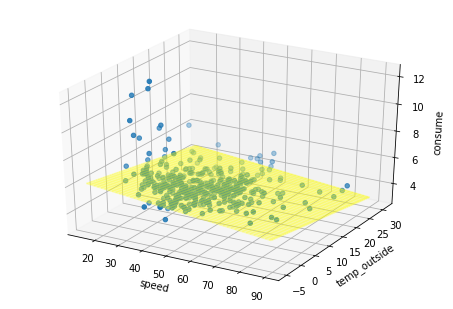

In [267]:
# 作図の設定
fig = plt.figure()
ax = Axes3D(fig)

# 軸の設定
ax.set_xlabel("speed")
ax.set_ylabel("temp_outside")
ax.set_zlabel("consume")

# プロット
ax.scatter3D(x2, x3 ,y)

# 直線のプロット
x2 = np.arange(min(x2), max(x2), (max(x2) - min(x2)) / 100)
x3 = np.arange(min(x3), max(x3), (max(x3) - min(x3)) / 100)
x2, x3 = np.meshgrid(x2, x3)
y1_est = w0 + w2 * x2 + w3 * x3 
ax.plot_wireframe(x2, x3, y1_est, color="yellow", alpha=0.3)
plt.show()


In [268]:
# 評価指標（回帰問題）　MAE RMSE MSE TEX_1_83
# (1)線形回帰モデルの呼び出し
# (2)回帰モデルの当てはめ　X:対象データ　y：正解データ
# (3)モデルを使用してＸに対して予測を実行し予測値を算出する

regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 値の予測 　回帰直線
y_pred = regr.predict(X)

# MSEの計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEの計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEの計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )



MSE = 0.901
MAE = 0.633
RMSE = 0.949
